### Lab 1
#### Jennifer Vo

This lab will explore various reporting basics in physics research, such as how the measure of "sigma" relates to probability, as well as the continuous exponential distribution and the discrete Poisson distribution.

In [2]:
# First I'll import the libraries I will need in this lab.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#### A Little Statistics
##### Part 1

To start off, let us try to integrate a standard normal distribution. A standard normal distribution is a Gaussian probability distribution, where the mean $\mu$ = 0 and standard deviation $\sigma$ = 1. The probability density function (pdf) and cumulative distribution function (cdf) are given by the following:

$$\text{pdf} = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$$

$$\text{cdf} = \frac{1}{2}[1+\text{erf}(\frac{x}{\sqrt{2\pi}})]$$

When reporting statistics, we often use $X\sigma$ as a way to describe how far away a data point is from the mean. We can also use the concept $X\sigma$ to report the probability that data takes on values that are either less than or equal to, or more than or equal to, a specific point. The cdf returns the probability that the data observed is less than or equal to a given value, so we can calculate the probability of values taking on more than a certain point x as Prob(X$\geq$x) = 1 - cdf(x).

Let's try calculating the probabilities that correspond to sigma values of 1.0, 1.2, and 1.4.

In [3]:
sigma1 = 1.0
prob1 = 1 - stats.norm.cdf(sigma1)
print(f'The probability is {prob1:.6f} for {sigma1:.2f} sigma.')

The probability is 0.158655 for 1.00 sigma.


In [4]:
sigma2 = 1.2
prob2 = 1 - stats.norm.cdf(sigma2)
print(f'The probability is {prob2:.6f} for {sigma2:.2f} sigma.')

The probability is 0.115070 for 1.20 sigma.


In [5]:
sigma3 = 1.4
prob3 = 1 - stats.norm.cdf(sigma3)
print(f'The probability is {prob3:.6f} for {sigma3:.2f} sigma.')

The probability is 0.080757 for 1.40 sigma.


When cross-checking this with a Z-table, it must be noted that a Z-table works with values to the left of the mean. Thus, the sigmas we tried are equivalent to their negative Z-value counterparts, and we can successfully see that the probabilities generated are correct.

Alternatively, to calculate the probability for a given sigma value, you can call the complementary error function, erfc(), which is related to the normal distribution by the following formula:
The probability that a standard normal variate assumes a value in the interval $[x,\infty]$ is given by $\phi =  \frac{1}{2} \text{erfc}(\frac{x}{\sqrt{2}} )$. Let's try this with our first sigma value, sigma1 = 1.0.

In [6]:
prob1prime = 0.5*scipy.special.erfc(sigma1/(2**0.5))
print(f'The probability of {sigma1:.2f} sigma is {prob1prime:.6f}.')

The probability of 1.00 sigma is 0.158655.


We can also confirm that our previously calculated probabilities are correct by converting the probabilities back to the sigma equivalents. I use the percent point function of stats.norm here (the opposite of cdf).

In [8]:
sigmaA = -stats.norm.ppf(prob1)
sigmaB = -stats.norm.ppf(prob2)
sigmaC = -stats.norm.ppf(prob3)

print(f'The sigma associated with {prob1:.6f} is {sigmaA:.2f}.')
print(f'The sigma associated with {prob2:.6f} is {sigmaB:.2f}.')
print(f'The sigma associated with {prob3:.6f} is {sigmaC:.2f}.')

The sigma associated with 0.158655 is 1.00.
The sigma associated with 0.115070 is 1.20.
The sigma associated with 0.080757 is 1.40.


Note that the associated sigmas returned from the stats.norm.ppf functions are actually negative, and I choose to flip the signs to be positive. This is because the ppf (point percentile function) is the inverse of the cdf (cumulative distribution function) which works with probabilities of obtaining data less than or equal to the data point observed, corresponding to the area under the curve to the left. This means the ppf would give the sigma to the left of the mean, but we want the sigma to the right, thus we will take the positive sigmas instead.

Here is an example of pulling a probability from a Z-table and finding the corresponding sigma. As Z-table probabilities are what one would find 
from integrating a probability density function up to a specific value, we will use 1 - (Z table Probability).

In [13]:
prob_table = 0.97725
prob_right = 1-0.97725
sigmaD = -stats.norm.ppf(prob_right)
print(f'To obtain a probability of {prob_right:.6f} we would need a sigma of {sigmaD:.2f}.')

To obtain a probability of 0.022750 we would need a sigma of 2.00.


##### Part 2

Now, I will explore a continuous analytic distribution. The exponential distribution is the probability distribution of the time between events in a Poission point process, in which events occur continuously and independently at a constant average rate $\lambda$ (events/time). The exponential distribution is memoryless, meaning the distribution of a "waiting time" until a certain event does not depend on how much time has elapsed already. Thus, the probability distribution for the time _between_ events is the same, independent of the time at which one starts to count events. The probability density function (pdf) and cumulative distribution function (cdf) are the following, both defined only for $x \geq 0$:

$$ \text{pdf = } \lambda e^{-\lambda x}$$

$$ \text{cdf =} 1-e^{-\lambda x}$$

I will graph the exponential distribution both as a histogram that uses random variables grouped into bins, and an analytic function with 1000 values in linear space between 0 and 10.

In [14]:
plt.rcParams["figure.figsize"] = (15,10)

In [19]:
# For stats.expon, the parameter "scale" is defined as scale = 1 / lambda
# So here I will use a lambda of 3, and the default location of 0.
a = 3
d = stats.expon.rvs(size = 100000, loc = 0, scale = 1/a)

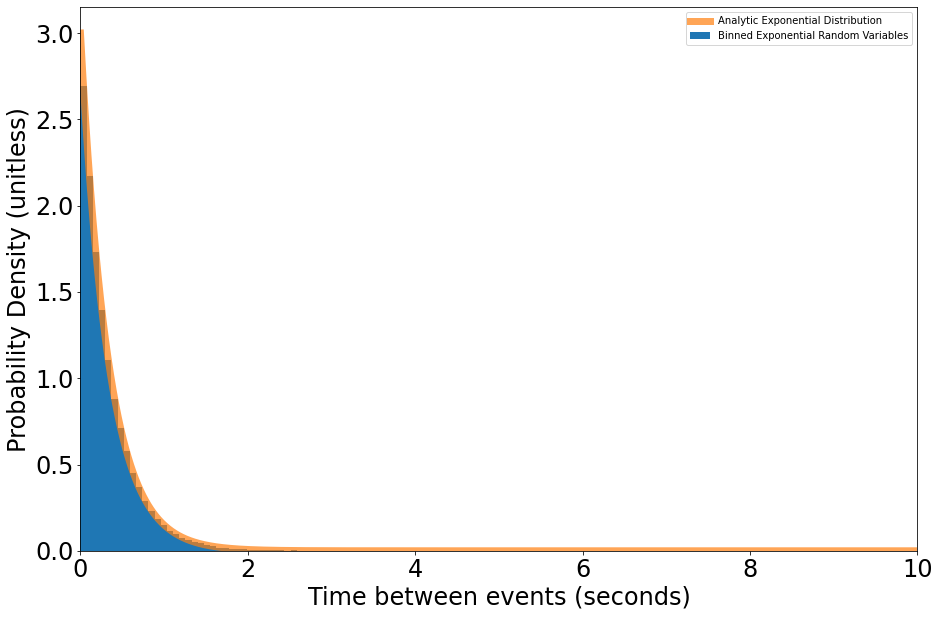

In [23]:
# We'll take the samples, group them into 50 bins, and normalize before plotting on a graph. 
fig1, ax1 = plt.subplots(1, 1)
ax1.hist(d, 50, density=True, label='Binned Exponential Random Variables')

# Here I change the plot parameters
plt.tick_params(labelsize = 24)
plt.xlim([0,10])

# To plot the analytic function, I will first create a linear space for x from 0 to 10,
# with 1000 values in between, to use as input values for the analytic distribution
x = np.linspace(0,10,1000)

# Lastly, I will plot the analytic distribution with lambda = 3, again scale = 1/lambda
ax1.plot(x,stats.expon.pdf(x, loc = 0, scale = 1/a), linewidth = 7, alpha = 0.7, label='Analytic Exponential Distribution')
plt.legend()
plt.xlabel('Time between events (seconds)', fontsize = 24)
plt.ylabel('Probability Density (unitless)', fontsize = 24)
plt.show()

What happens if I plot this on a semi-log graph? Plotting a continuous Gaussian distribution on a semi-log graph shows an upside-down parabola. For an exponential distribution, you would expect a negative linear plot.

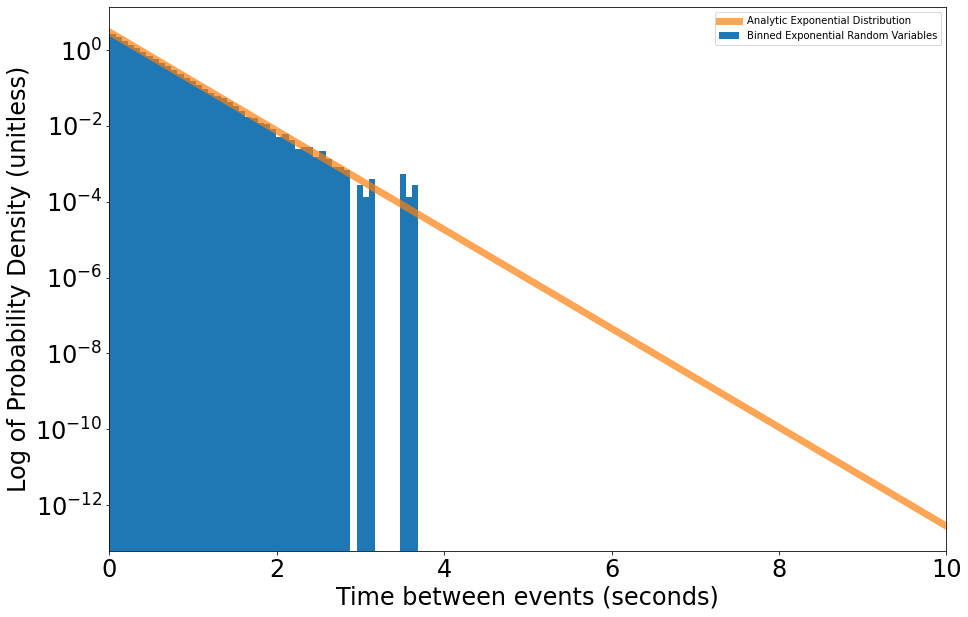

In [27]:
# We will repeat all of the steps before, except we will plot it on a graph where y is on log-scale. 
fig2, ax2 = plt.subplots(1, 1)
ax2.hist(d, 50, density=True, label='Binned Exponential Random Variables')

plt.tick_params(labelsize = 24)
plt.xlim([0,10])

x = np.linspace(0,10,1000)
ax2.plot(x,stats.expon.pdf(x, loc = 0, scale = 1/a), linewidth = 7, alpha = 0.7, label='Analytic Exponential Distribution')
plt.yscale('log')
plt.xlabel('Time between events (seconds)', fontsize = 24)
plt.ylabel('Log of Probability Density (unitless)', fontsize = 24)
plt.legend()
plt.show()

As we can see, the semi-log plot of the exponential distribution is linear, which is what we were expecting.

##### Part 3

Next, I will imagine I have some signal-free data that follows an exponential distribution with a constant rate parameter of $\lambda$ = 1 event/hour. In this hypothetical scenario, I have a specific measurement of x = 3 events/hour, and I would like to know the answer to the following question:

**"What is the probability that the data produced a signal that is equally or more signal-like than what I observed?"**

In other words, what are the odds that the data point x = 3 was produced by background noise?

We can represent the answer to this question mathematically with the following integral:

$$ \text{Probability =} \int_{3}^{\infty}\text{ pdf(x) dx = }\int_{3}^{\infty}\lambda e^{-\lambda x} \text{dx} = \int_{3}^{\infty}e^{-x} \text{dx}$$

Let's calculate this probability for x = 3 and convert it into an equivalent sigma value.

In [40]:
sample1 = 3
lamb1 = 1
prob_expon1 = 1 - stats.expon.cdf(sample1, scale = 1/lamb1)
print(f'The probability that the data produced a signal equally or more signal-like that what I observed is {prob_expon1:.6f}.')

The probability that the data produced a signal equally or more signal-like that what I observed is 0.049787.


In [42]:
# Convert into equivalent sigma value
sigma_expon1 = -stats.norm.ppf(prob_expon1)
print(f'The corresponding sigma for this probability is {sigma_expon1:.4f}.')

The corresponding sigma for this probability is 1.6469.


##### Part 4
I can try a few different values of observed data to look for patterns in the probability and sigma values.

In [45]:
sample2 = 4
sample3 = 6
sample4 = 8

prob_expon2 = 1 - stats.expon.cdf(sample2)
prob_expon3 = 1 - stats.expon.cdf(sample3)
prob_expon4 = 1 - stats.expon.cdf(sample4)

sigma_expon2 = -stats.norm.ppf(prob_expon2)
sigma_expon3 = -stats.norm.ppf(prob_expon3)
sigma_expon4 = -stats.norm.ppf(prob_expon4)

print(f'The probability that the data produced a signal equally or more signal-like than x = {sample2:.1f} is {prob_expon2:.6f}.')
print(f'The corresponding sigma probability for this is {sigma_expon2:.2f}.')
print(f'The probability that the data produced a signal equally or more signal-like than x = {sample3:.1f} is {prob_expon3:.6f}.')
print(f'The corresponding sigma probability for this is {sigma_expon3:.2f}.')
print(f'The probability that the data produced a signal equally or more signal-like than x = {sample4:.1f} is {prob_expon4:.6f}.')
print(f'The corresponding sigma probability for this is {sigma_expon4:.2f}.')

The probability that the data produced a signal equally or more signal-like than x = 4.0 is 0.018316.
The corresponding sigma probability for this is 2.09.
The probability that the data produced a signal equally or more signal-like than x = 6.0 is 0.002479.
The corresponding sigma probability for this is 2.81.
The probability that the data produced a signal equally or more signal-like than x = 8.0 is 0.000335.
The corresponding sigma probability for this is 3.40.


As I observe higher data values, the probability that the data produced a signal equally or more signal-like than that data value decreases, and the corresponding sigma increases. This makes sense, as the farther away from the mean the observed data point is, the less likely that it is for the signal-free data to produce that result.

#### Non-continuous distributions

##### Part 1A
Next, I will explore discrete distributions. In particular, I will look at the Poisson distribution, which expresses the probability of a given number of events occuring within a fixed interval of time or space, if events occur with a known constant mean rate $\lambda$, and occur independently of the time since the last event. The probability mass function (pmf) is given by the following, 
where k is the number of occurances (integer between 0 and $\infty$), and $\lambda$ > 0 is the constant mean rate of events occuring:
$$\text{pmf = Pr(X=k) = }\frac{\lambda^k e^{-\lambda}}{k!}$$

The Poisson cumulative distribution function (cdf) is given by:
$$\text{cdf = }e^{-\lambda} \sum_{i=0}^{k} \frac{\lambda^i}{i!} $$

The $\lambda^k$ and the $k!$ terms can cause overflow errors, so when using large values of k, it is recommend to instead use approximations involving gamma and ln for numerical stability. In this report, I will stick to smaller values of k so as not to introduce overflow errors.

##### Part 1B
As an example, I can plot the Poisson probability distribution for $\lambda$ = 1, 2, 3, and 4. I will do that here by creating arrays that contain the number of occurrences k (x) and the probability mass (y), then plotting those for each lambda.

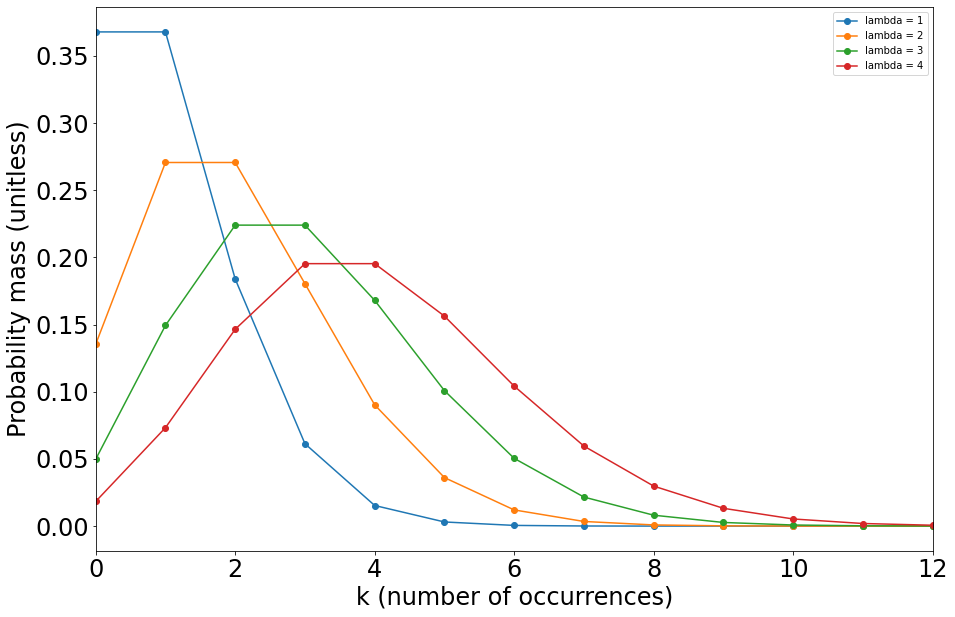

In [57]:
# Create the subplots
fig3, ax3 = plt.subplots(1, 1)

# Create a function to build arrays for x (occurences) and y (Probability mass)
def poisson(m):
    x = []
    y = []
    for i in range (0, 13):
        x.append(i)
        y.append(stats.poisson.pmf(i, m))

    return x, y

# Initialize the data with lambda = 1, 3, 5, 10 for 100k samples
m1 = 1
m2 = 2
m3 = 3
m4 = 4

# Generate the arrays of data with the different lambda values
x1, y1 = poisson(m1)
x2, y2 = poisson(m2)
x3, y3 = poisson(m3)
x4, y4 = poisson(m4)

# Plot the Poisson distributions with the different lambda values
plt.plot(x1, y1, '-o', label = 'lambda = 1')
plt.plot(x2, y2, '-o', label = 'lambda = 2')
plt.plot(x3, y3, '-o', label = 'lambda = 3')
plt.plot(x4, y4, '-o', label = 'lambda = 4')

# Here I change the plot parameters
plt.tick_params(labelsize = 24)
plt.xlim([0,12])

plt.xlabel('k (number of occurrences)', fontsize = 24)
plt.ylabel('Probability mass (unitless)', fontsize = 24)
plt.legend()
plt.show()

We can observe from the graph that each distribution has a maximum probability mass at their value of k = $\lambda$. The Poisson distribution is defined with the expected value equal to its corresponding $\lambda$.

We also observe that the poisson distribution's width increases with $\lambda$. The Poisson distribution's variance is also defined to equal the parameter $\lambda$.

##### Part 1C
Next, I will again imagine I have some signal-free data that follows a Poisson distribution. In this hypothetical scenario, the data has an average number of occurances $\lambda$ = 1.1 within some time period, and during this period of time I observe 5 occurances. I would like to know the answer to the following question:

**"What is the probability that the signal-free data produced a signal that is equally or more signal-like than what I observed?"**

In other words, what are the odds that observing 5 events was produced by background noise?

We can represent the answer to this question mathematically with:

$$\text{Probability =  1 - cdf}(\lambda=1.1;k=5) = 1 - e^{-\lambda} \sum_{i=0}^{k} \frac{\lambda^i}{i!} = 1 - e^{-1.1} \sum_{i=0}^{5} \frac{1.1^i}{i!} $$

In [64]:
m = 1.1
k = 5
prob_poisson = 1-stats.poisson.cdf(k,m)
sigma_poisson = -stats.norm.ppf(prob_poisson)
print(f'The probability that the data produced a signal equally or more signal-like than my observation of 5 occurances is {prob_poisson:.6f}.')
print(f'This corresponds to a sigma value of {sigma_poisson:.2f}.')

The probability that the data produced a signal equally or more signal-like than my observation of 5 occurances is 0.000968.
This corresponds to a sigma value of 3.10.


##### Part 1D

When working with discrete distributions, the probabilities and sigmas are also discrete as a result. This is because the probabilities depend on the result that is observed, and there are only so many integer (discrete) values that can be recorded, each with its own probability which answers the posed question.

This is not an issue when converting discrete, calculated probabilities to sigma equivalents. However, if we are looking to find the observed value for which sigma is a specific number (for example the physics research standard of 5$\sigma$) there may not be a corresponding probability from that discrete distribution, and thus no integer value that answers the question. In this case, we would need to look at data that is composed of the averages of many trials, thereby plotting the probability distribution function as a continuous plot, and then find the corresponding value that gives us the desired sigma.

##### Part 1E
In discrete distributions, while the samples and the probabilities are both discrete, the parameters of the distributions can be continous. 

In the Poisson distribution, the mean can take on integer values or non-integer values, for example $\lambda$ = 9.2. This is because in the Poisson distribution, the parameter $\lambda$ is an average, so with division involved the result can be either integer or non-integer.

So to summarize, in the discrete Poisson probability distribution, the possible observed number of occurences k is discrete, the probabilities and sigmas are discrete, and the parameter $\lambda$ is continuous. 